# Analysis of BioImages (in Progress)

This is becoming a collection of Python-based example codes focussing on image analysis of biological matter. Apologies for the code often being a little sloppy and "easy-going". Due to a limited time frame, priorities were set to "progress & visualization" instead of "finding the most efficient solution" :) <br>
Whenever a function or method is developed to fulfill the goals, it is outsources into the subfolder "ModulesOwnAndExternalModified", take a look and have fun. Check out my website (www.bio-century.net) for more projects, literature recommendations, links to data bases and further inspirations.

# Table of Contents
0. [Reference Table](#ReferenceTable)
1. [Nuclei Detection on Fluorescence Images](#NucleiDetectionOnFluorescenceImages)
   1. [First Analysis on 'Synthetic Cell'-Micrographs](#FirstAnalysisonSyntheticCellMicrographs)
      1. [Binary Masks & Automated Cell Count](#BinaryMasksAndAutomatedCellCount)
      2. [Crosscheck of Cell Count Algorithm](#CrosscheckOfCellCountAlgorithm)
      3. [Inspection of Curvature](#InspectionOfCurvature)
      4. [Ellipse Fitting on Nuclei](#EllipseFittingOnNuclei)
   2. [Analysis on Real (Low Density) Cell Data](#AnalysisOnRealLowDensityCellData)
      1. [Import and Presentation of Online Data](#ImportAndPresentationOfOnlineCellDatasets)
      2. [Binary Masks on Nuclei and Whole Cells](#BinaryMasksOnNucleiAndWholeCells)
      3. [Ellipse Fitting of Nuclei and Whole Cells](#FirstAnalysisOnAnExampleMicrograph)
      4. [Segmentation of Cells using Voronoi Tesselation](#SegmentationOfCellsUsingVoronoiTesselation)
2. [Analysis of Time Series Recordings](#AnalysisOfTimeLapseSeries)
   1. [Automated Curvature Inspection of Real Cells](#AutomatedCurvatureInspectionOfRealCells)
3.   [Appendix](#Appendix)
     1.   [.html-Export of Code](#htmlExportOfCode)

# 1. <a name="NucleiDetectionOnFluorescenceImages">Nuclei Detection on Fluorescence Images</a>

## 1.1 <a name="FirstAnalysisonSyntheticCellMicrographs">First Analysis on 'Synthetic Cell'-Micrographs</a>

### 1.1.1 <a name="BinaryMasksAndAutomatedCellCount">Binary Masks & Automated Cell Count</a>

Goal:
Count nuclei of a fluorescence micrograph in an automated way

Steps 1: Import micrograph and compute a binary mask.

In [1]:
# sources
# - https://bbbc.broadinstitute.org/BBBC005
# - https://bbbc.broadinstitute.org/search/synthetic%20cells?
# - https://www.geeksforgeeks.org/distance-transformation-in-image-python-opencv/
# - https://www.geeksforgeeks.org/how-to-adjust-the-position-of-a-matplotlib-colorbar/
# - https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html
# - https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html
# - https://stackoverflow.com/questions/70361424/extract-white-regions-from-binary-images
# - https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_fill_holes.html
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python
# - https://www.youtube.com/watch?v=WQpXS9gBEu8


# data source
# Synthetic cells, Accession number BBBC005 · Version 1
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, H. Huttunen and O. Yli-Harja,
# "Computational Framework for Simulating Fluorescence Microscope Images With Cell Populations,"
# in IEEE Transactions on Medical Imaging, vol. 26, no. 7, pp. 1010-1016, July 2007, doi: 10.1109/TMI.2007.896925.
# 
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, T. Rajala and O. Yli-Harja,
# "Synthetic Images of High-Throughput Microscopy for Validation of Image Analysis Methods,"
# in Proceedings of the IEEE, vol. 96, no. 8, pp. 1348-1360, Aug. 2008, doi: 10.1109/JPROC.2008.925490.
# 
# - https://bbbc.broadinstitute.org/BBBC005
# - https://bbbc.broadinstitute.org/search/synthetic%20cells?
# data are published under CC0 1.0 Universal (CC0 1.0), https://creativecommons.org/publicdomain/zero/1.0/


# import modules
import cv2
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage

# initialize and define variables and parameter
# fileName           = "SIMCEPImages_A23_C96_F1_s19_w1.TIF"                     # mask
fileName          = "SIMCEPImages_A23_C96_F1_s19_1_real.TIF"                    # "real" image
cellCountTruth     = int(fileName[fileName.find('_C')+2:fileName.find('_F')])   # extract real cell number from filename
myThresholdValue   = 70                                                         # treshold value for binary mask
myImage            = cv2.imread('./Data/' + fileName)           # read image
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
# ret, thresh        = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# fill holes
# define binary mask on computed on thresholded image
myImageThresholded                                = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > myThresholdValue] = 1
myImageThresholded                                = ndimage.binary_fill_holes(myImageThresholded).astype(int)


# plot figure
fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myImageThresholded, cmap = cm.coolwarm)
divider            = make_axes_locatable(ax)
cax                = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
fig.add_axes(cax)
cbar               = fig.colorbar(im, cax = cax, ticks = [-1, 0, 1], orientation = 'horizontal')
TitleString = "\"Synthetic cells\": Binary Mask\n"
plt.title(TitleString, fontweight="bold", fontsize = 16, y = 22.3)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.91)
ax.set_xlabel("binary mask color scheme")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Step 2: Identify single objects and draw contours

---------------------------
     Number of Cells
---------------------------
Detected: 		 74
True Value: 		 96
---------------------------
Merged Cells Delta: 	-22


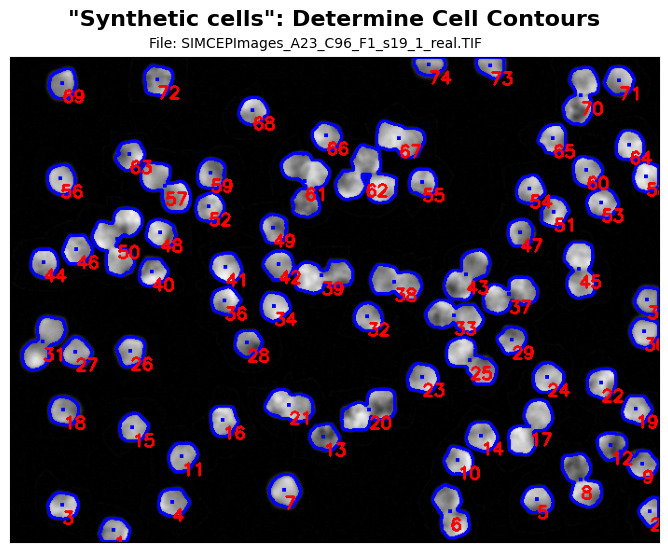

In [2]:
# sources
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# - https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# - https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python


# source of main algorithm
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# User: Costas Voglis


# - https://de.mathworks.com/matlabcentral/answers/43435-i-couldn-t-understand-convex-area
# prop.convex_area / prop.filled_area
# convex_area (convex hull): the smallest region that satisfy two conditions: (1) it is convex (2) it contains
# the original region.
# => The ratio increases the less convex the area is (multiple nuclei)


# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from statistics import mean

# initialize and define variables and parameter
# tresholds for
# 1Cell:             single cell
# 2CellCluster:      two cells
# gt2CellCluster:    greater than two cells
dictThresholdValues                 = {}
dictThresholdValues["1Cell"]        = 0
dictThresholdValues["2CellCluster"] = 1.065
dictThresholdValues["gt2CellCluster"] = 1.195


# compute results
# compute mean area for a single nucleus
meanFilledAreaTmp = Groundwork.meanFilledArea(myImage, myImageThresholded, dictThresholdValues)

# execute main algorith to identify cells and cell cluster
cellCount, contours, myImageContours, myMaskContoursAll = Groundwork.identifyCellContoursAndAreaOverlays(myImage, 
                                                                                                         myImageThresholded, 
                                                                                                         dictThresholdValues,
                                                                                                         meanFilledAreaTmp)

# print table to compare cellcounts
print("-" * 27, end = '\n')
print("     Number of Cells")
print("-" * 27, end = '\n')
print("Detected: \t\t " + str(len(contours)))
print("True Value: \t\t " + str(cellCountTruth))
print("-" * 27, end = '\n')
print("Merged Cells Delta: \t" + str(len(contours) - cellCountTruth))

# plot figure
fig, ax = plt.subplots(figsize = (15, 7))
im      = ax.imshow(myImageContours, cmap = cm.coolwarm)
divider = make_axes_locatable(ax)
cax     = divider.new_vertical(size = "5%",
                           pad = 0.3,
                           pack_start = True)
TitleString = "\"Synthetic cells\": Determine Cell Contours\n"
plt.title(TitleString, fontweight = "bold", fontsize = 16)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.91)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

For illustration purposes: Compute prop.convex_area-to-prop.filled_area distribution on the binary mask, which shall be taken as a criterium for multi-nuclei detection later on and defined in the above section.

In [3]:
# source of main algorithm
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# User: Costas Voglis

# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import regionprops
from statistics import mean
from matplotlib.gridspec import GridSpec

# contours, hierarchy = cv2.findContours(myImageThresholded.astype(np.uint8), 1, 2)
ratio_conv_filled_All = []

for ii, cnt in enumerate(contours):
    M               = cv2.moments(cnt)
    area            = cv2.contourArea(cnt)
    perimeter       = cv2.arcLength(cnt, True)
    perimeter       = round(perimeter, 1)
    myImageContours = cv2.drawContours(myImage, [cnt], -1, (0, 0, 255), 2)

    myMaskZeros       = np.zeros(myImage.shape, np.uint8)
    myMaskContoursTmp = cv2.drawContours(image = myMaskZeros, contours=[cnt], contourIdx = -1, color = (255, 255, 255), thickness = cv2.FILLED)
    myMaskContours                           = np.zeros(myImage.shape)
    myMaskContours[myMaskContoursTmp == 255] = 1
    props = regionprops(myMaskContoursTmp, cache = False)
    prop = props[0]
    
    ratio_conv_filled_All.append(prop.convex_area / prop.filled_area)


# plot figure
fig = plt.figure(figsize = (16, 5))
gs = GridSpec(nrows = 1, ncols = 1)

ax0 = fig.add_subplot(gs[0, 0])
plt.hist(ratio_conv_filled_All, bins=30)
ax0 = plt.gca()
min_ylim, max_ylim = plt.ylim()
plt.axvline(dictThresholdValues["2CellCluster"], color='k', linestyle='dashed', linewidth = 1)
plt.text(dictThresholdValues["2CellCluster"]*1.005, max_ylim*0.9, 'Borderline 1 or 2 Cells: {:.2f}'.format(dictThresholdValues["2CellCluster"]))
plt.axvline(dictThresholdValues["gt2CellCluster"], color='k', linestyle='dashed', linewidth = 1)
plt.text(dictThresholdValues["gt2CellCluster"]*1.005, max_ylim*0.9, 'Borderline 2 or 3 Cells: {:.2f}'.format(dictThresholdValues["gt2CellCluster"]))
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.3)
ax0.set_title('prop.convex_area / prop.filled_area')
ax0.set_xlabel('prop.convex_area / prop.filled_area')
ax0.set_ylabel('number of nucleic regions')
ax0.set_xticks(np.arange(1, 1.3, 0.01));
ax0.set_yticks(np.arange(0, 30, 1));

Step 3: Identify multi-nuclei regions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---------------------------
     Number of Cells
---------------------------
Detected previously: 	 74
Detected now: 		 96
True Value: 		 96
---------------------------
Merged cells delta: 	 0


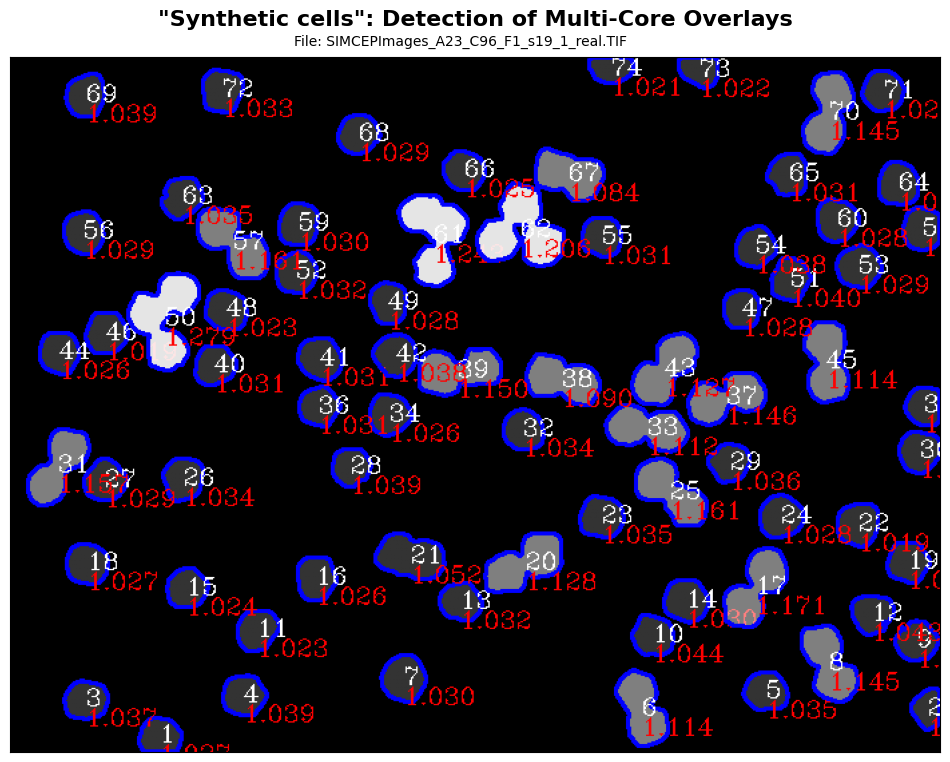

In [4]:
# sources
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# - https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# - https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python


# compute results
# print table to compare cellcounts
print("-" * 27, end = '\n')
print("     Number of Cells")
print("-" * 27, end = '\n')
print("Detected previously: \t " + str(len(contours)))
print("Detected now: \t\t " + str(cellCount))
print("True Value: \t\t " + str(cellCountTruth))
print("-" * 27, end = '\n')
print("Merged cells delta: \t " + str(cellCount - cellCountTruth))

# plot figure
fig, ax = plt.subplots(figsize = (15, 7))
fig.set_figwidth(12)
fig.set_figheight(12)
ax.imshow(myMaskContoursAll)
TitleString = "\"Synthetic cells\": Detection of Multi-Core Overlays\n"
plt.title(TitleString, fontweight="bold", fontsize = 16)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.803)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### 1.1.2 <a name="CrosscheckOfCellCountAlgorithm">Crosscheck of Cell Count Algorithm</a>

Goal: Count nuclei of a set of fluorescence micrographs in an automated way and identify the offset on each image by comparison to the ground truth number

------------------------------------------------------------------------------------------------------------------------------------------
                    print scheme: <filename>  <TrueNumberNuclei>  <ComputedNumberNuclei>
------------------------------------------------------------------------------------------------------------------------------------------
SIMCEPImages_A01_C1_F1_s01_w1.TIF: 1  1		SIMCEPImages_A01_C1_F1_s02_w1.TIF: 1  1		SIMCEPImages_A01_C1_F1_s03_w1.TIF: 1  1		
SIMCEPImages_A02_C5_F1_s01_w1.TIF: 5  5		SIMCEPImages_A02_C5_F1_s02_w1.TIF: 5  5		SIMCEPImages_A02_C5_F1_s03_w1.TIF: 5  5		
SIMCEPImages_A03_C10_F1_s01_w1.TIF: 10  10	SIMCEPImages_A03_C10_F1_s02_w1.TIF: 10  10	SIMCEPImages_A03_C10_F1_s03_w1.TIF: 10  9	
SIMCEPImages_A04_C14_F1_s01_w1.TIF: 14  14	SIMCEPImages_A04_C14_F1_s02_w1.TIF: 14  14	SIMCEPImages_A04_C14_F1_s03_w1.TIF: 14  14	
SIMCEPImages_A05_C18_F1_s01_w1.TIF: 18  18	SIMCEPImages_A05_C18_F1_s02_w1.TIF: 18  18	SIMCEPImages_A05_C18_F1_s03_w1.TIF: 18  

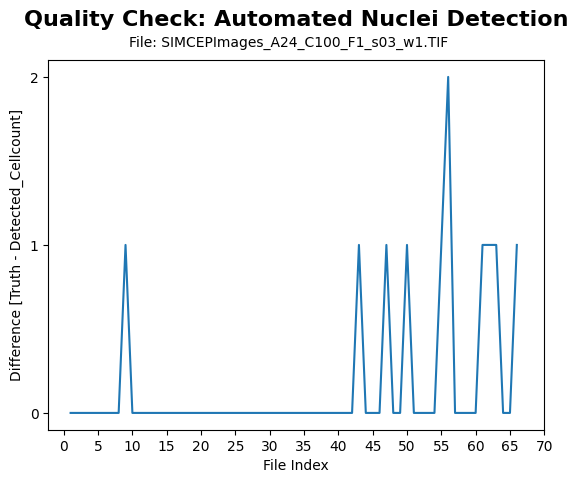

In [5]:
# sources
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# - https://pynative.com/python-list-files-in-a-directory/
# - https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# - https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python


# data source
# Synthetic cells, Accession number BBBC005 · Version 1
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, H. Huttunen and O. Yli-Harja,
# "Computational Framework for Simulating Fluorescence Microscope Images With Cell Populations,"
# in IEEE Transactions on Medical Imaging, vol. 26, no. 7, pp. 1010-1016, July 2007, doi: 10.1109/TMI.2007.896925.
# 
# A. Lehmussola, P. Ruusuvuori, J. Selinummi, T. Rajala and O. Yli-Harja,
# "Synthetic Images of High-Throughput Microscopy for Validation of Image Analysis Methods,"
# in Proceedings of the IEEE, vol. 96, no. 8, pp. 1348-1360, Aug. 2008, doi: 10.1109/JPROC.2008.925490.


# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.measure import regionprops
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
import matplotlib.pyplot as plt
import numpy as np

plotvalue = True
# plotvalue = False

if plotvalue == True:
    xpoints = []
    ypoints = []

    # tresholds for
    # 1Cell:             single cell
    # 2CellCluster:      two cells
    # gt2CellCluster:    greater than two cells
    dictThresholdValues                 = {}
    dictThresholdValues["1Cell"]        = 0
    dictThresholdValues["2CellCluster"] = 1.05
    dictThresholdValues["gt2CellCluster"] = 1.2


    myThresholdValue                    = 70
    meanFilledAreaAll                   = []

    res = []
    dir_path = './DataExternalSyntheticCells'

    for path in os.listdir(dir_path):
        if os.path.isfile(os.path.join(dir_path, path)):
            res.append(path)

    # compute mean area for a single nucleus with all file info
    for ii, fileNameTmp in enumerate(res):
        fileName          = fileNameTmp
        cellCountTruth    = int(fileName[fileName.find('_C') + 2 : fileName.find('_F')])
        myImage                                            = cv2.imread('./DataExternalSyntheticCells/' + fileName)
        myImageGray                                        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
        myImageThresholded                                 = np.zeros(myImageGray.shape)
        myImageThresholded[myImageGray > myThresholdValue] = 1
        myImageThresholded                                 = ndimage.binary_fill_holes(myImageThresholded).astype(int)
        meanFilledArea = Groundwork.meanFilledArea(myImage, myImageThresholded, dictThresholdValues)
        meanFilledAreaAll.append(meanFilledArea)
    meanFilledArea = mean(meanFilledAreaAll) 

    # execute main algorith on all files to identify cells and cell cluster
    print("-" * 138)
    print(" " * 20 + "print scheme: " + "<filename>  <TrueNumberNuclei>  <ComputedNumberNuclei>")
    print("-" * 138)
    for ii, fileNameTmp in enumerate(res):
        fileName          = fileNameTmp
        cellCountTruth    = int(fileName[fileName.find('_C') + 2 : fileName.find('_F')])
        myImage                                            = cv2.imread('./DataExternalSyntheticCells/' + fileName)
        myImageGray                                        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
        myImageThresholded                                 = np.zeros(myImageGray.shape)
        myImageThresholded[myImageGray > myThresholdValue] = 1
        myImageThresholded                                 = ndimage.binary_fill_holes(myImageThresholded).astype(int)

        
        cellCount, contours, myImageContours, myMaskContoursAll = Groundwork.identifyCellContoursAndAreaOverlays(myImage,
                                                                                                                myImageThresholded,
                                                                                                                dictThresholdValues,
                                                                                                                meanFilledArea)
        if ii < 6:
            print(fileName + ": " + str(cellCountTruth) + "  " + str(cellCount) + "\t\t", end = '')
        else:
            print(fileName + ": " + str(cellCountTruth) + "  " + str(cellCount) + "\t", end = '')
        
        if (ii + 1) % 3 == 0:
            print("\n", end = '')
        
        xpoints.append(ii + 1)
        ypoints.append(cellCountTruth - cellCount)

    # plot figure
    TitleString = "Quality Check: Automated Nuclei Detection"
    x = np.linspace(0, 1, 2)
    plt.plot(xpoints, ypoints)
    plt.title(TitleString, fontweight="bold", fontsize = 16, y = 1.07)
    plt.suptitle("File: " + fileName, fontsize = 10, y = 0.93)
    plt.xlabel("File Index")
    plt.ylabel("Difference [Truth - Detected_Cellcount]")
    plt.xticks(np.arange(0, 72, 5))
    plt.yticks(np.arange(0, 3, 1))
    plt.show()

### 1.1.3 <a name="InspectionOfCurvature">Inspection of Curvature</a>

Goal: Play with the curvature of the contour and see, if the results can be used for nuclei separation.

Step 1: Compute Curvature

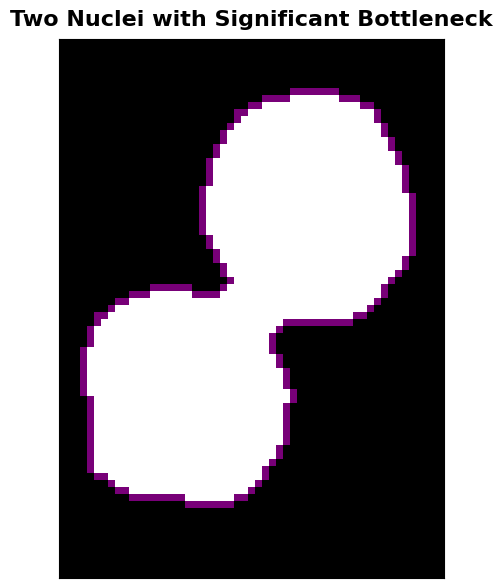

In [6]:
# import modules
import cv2
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage


# initialize and define variables and parameter
fileName          = "test1.png"
myImage            = cv2.imread('./Data/' + fileName)
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
myImageThresholded                                = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > 0] = 1
myImageThresholded                                = ndimage.binary_fill_holes(myImageThresholded).astype(int)


# compute results
contours, hierarchy    = cv2.findContours(myImageGray.astype(np.uint8), 1, 1)
for ii, cnt in enumerate(contours):
    myMaskContoursAll2 = cv2.drawContours(myImage, [cnt], -1, (120,0,120), 1)


# plot figure
fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myMaskContoursAll2)
TitleString = "Two Nuclei with Significant Bottleneck"
plt.title(TitleString, fontweight="bold", fontsize = 16, y = 1.01)
# plt.suptitle("File: " + fileName, fontsize = 10, y = 0.93)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [7]:
# import modules
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork


contoursxy = np.zeros((len(contours[0]), 2))
ll = list(contours[0])
contoursx = []
contoursy = []

# print(contoursx)
for ii in range(len(ll)):
    contoursx.append(ll[ii][0][0])
    contoursy.append(ll[ii][0][1])

contoursxy[:,0]=contoursx
contoursxy[:,1]=contoursy

# print(contoursxy)
contourCurvature, contourPixels = Groundwork.calculateContourCurvature(contoursxy)
print(contourCurvature[:,])
print(contourPixels)
print(max(contourCurvature))

[0.1767767  0.35777088 0.25       0.25       0.17888544 0.
 0.         0.08944272 0.70710678 0.08944272 0.         0.17888544
 0.         0.         0.         0.17888544 0.25       0.25
 0.17888544 0.17888544 0.25       0.         0.         0.
 0.25       0.17888544 0.         0.         0.         0.
 0.         0.17888544 0.75       0.26516504 0.35777088 0.25
 0.25       0.17888544 0.17888544 0.25       0.         0.
 0.25       0.17888544 0.17888544 0.         0.17888544 0.
 0.17888544 0.         0.08944272 0.70710678 0.08944272 0.17888544
 0.         0.17888544 0.17888544 0.25       0.         0.
 0.         0.25       0.17888544 0.17888544 0.25       0.
 0.         0.         0.         0.         0.         0.
 0.25       0.4472136  0.26832816 0.17888544 0.         0.17888544
 0.         0.17888544 0.25       0.         0.         0.
 0.         0.25       0.17888544 0.17888544 0.25       0.
 0.         0.         0.25       0.17888544 0.         0.17888544
 0.08838835 0.088388

Step 2: Plot Curvature and see, if there are significant maxima

In [8]:
# import modules
import numpy as np
import matplotlib.pyplot as plt


# compute results
print(len(contourCurvature))
y = contourCurvature


# plot figure
fig = plt.figure(figsize = (20, 5))
plt.plot(y)
plt.xticks(np.arange(0, len(contourCurvature), 5))
plt.axvline(32, color='k', linestyle='dashed', linewidth = 1)
plt.axvline(117, color='k', linestyle='dashed', linewidth = 1)
TitleString = "Curvature Value for Each Pixel of the Perimeter"
plt.title(TitleString, fontweight="bold", fontsize = 16, y = 1.01)
plt.xlabel("File Index")
plt.ylabel("Curvature Value")
plt.show()
print(contourPixels[28])

172


[30, 22]


Step 3: Filter with Gaussian in order to get reliable maxima detection

In [9]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter


# compute results
print(len(contourCurvature))
y = contourCurvature
yhat = gaussian_filter(y, sigma=2)


# plot figure
fig = plt.figure(figsize = (20, 5))
plt.plot(yhat)
plt.xticks(np.arange(0, len(contourCurvature), 5))
plt.axvline(32, color='k', linestyle='dashed', linewidth = 1)
plt.axvline(117, color='k', linestyle='dashed', linewidth = 1)
TitleString = "Gauss-Filtered Curvature Value for Each Pixel of the Perimeter"
plt.title(TitleString, fontweight = "bold", fontsize = 16, y = 1.01)
plt.xlabel("File Index")
plt.ylabel("Gauss-Filtered Curvature Value")
plt.show()

print(contourPixels[28])

172


[30, 22]


Step 4: Find maxima on Gaussian-filtered curvature values

In [10]:
# import modules
from scipy.signal import find_peaks


# compute maxima
peaks, values = find_peaks(yhat, height = 0)
list2         = values['peak_heights']
list2.sort()
yhat1         = list(yhat)
xx1           = np.where(yhat == list2[-1])
xx2           = np.where(yhat == list2[-2])


# print results
print(int(xx1[0]))
print(int(xx2[0]))

33
118


Step 5: Plot maxima of Gaussian-filtered curvature values into the image respecting their positions

In [31]:
# sources
# - https://en.wikipedia.org/wiki/Curvature

# source of algorithms
# - https://github.com/jmschabdach/caulobacter-curvature/blob/master/calculatingCellCurvature.py

myMaskContoursAllSepLine2 = myMaskContoursAll2


# plot figure
fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myMaskContoursAllSepLine2)
divider            = make_axes_locatable(ax)
cax                = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
TitleString = "\"Synthetic cells\": Binary Mask\n"
ax.set_xlabel("binary mask color scheme")
cv2.circle(myMaskContoursAllSepLine2, (contourPixels[int(xx1[0])][1], contourPixels[int(xx1[0])][0]), 2, (0, 120, 120), -1)
cv2.circle(myMaskContoursAllSepLine2, (contourPixels[int(xx2[0])][1], contourPixels[int(xx2[0])][0]), 2, (0, 120, 120), -1)
start_point = [contourPixels[int(xx1[0])][1], contourPixels[int(xx1[0])][0]]
end_point = [contourPixels[int(xx2[0])][1], contourPixels[int(xx2[0])][0]]
cv2.line(myMaskContoursAllSepLine2, start_point, end_point, (250, 0, 0), 2)
TitleString = "Bottleneck-Cells with Curvature and Maxima-Bridge"
plt.title(TitleString, fontweight = "bold", fontsize = 16, y = 1.01)
plt.xlabel("x-position [px]")
plt.ylabel("y-position [px]")

plt.show()

Step 6: Plot Gaussian-filtered curvature values with jet-map color-coding

---------------------------
     Max Values
---------------------------
23 35
---------------------------


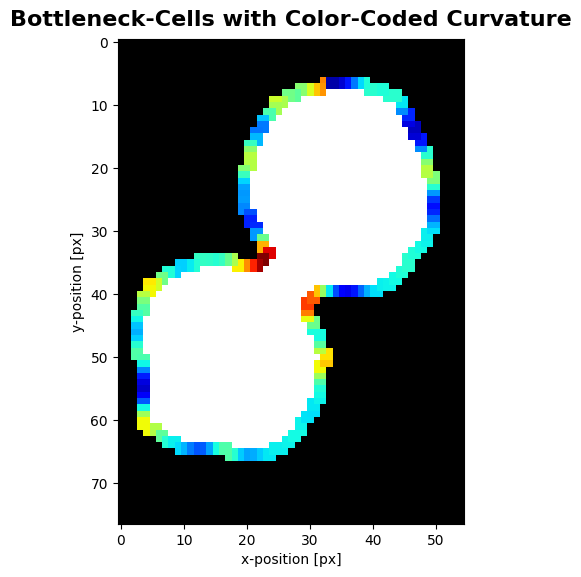

In [12]:
# import modules
import cv2
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')


# initialize and define variables and parameter
fileName          = "test1.png"
myImage            = cv2.imread('./Data/' + fileName)


myMaskContoursAllCurvatureValues = myImage
contoursxy[:,0]=contoursx
contoursxy[:,1]=contoursy


# print max values
print("-" * 27, end = '\n')
print("     Max Values")
print("-" * 27, end = '\n')
print(contourPixels[int(xx1[0])][1], contourPixels[int(xx1[0])][0])
print("-" * 27, end = '\n')


# compute results
myMaskContoursAllCurvatureValues = myImage
for ii in range(len(contourPixels)):
    colorValue = 255*yhat[ii]/max(yhat)
    colorPos   = int(round(colorValue))
    rcolor     = int(round(cm.jet(colorPos)[0]*255))
    gcolor     = int(round(cm.jet(colorPos)[1]*255))
    bcolor     = int(round(cm.jet(colorPos)[2]*255))
    rgbcolor   = [rcolor, gcolor, bcolor]
    # print(ii, contourCurvature[ii], colorPos, rgbcolor)
    myMaskContoursAllCurvatureValues[int(contoursxy[ii,1])-1:int(contoursxy[ii,1])+1,int(contoursxy[ii,0])-1:int(contoursxy[ii,0])+1,:] = rgbcolor


# plot figure
fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myMaskContoursAllCurvatureValues)
divider            = make_axes_locatable(ax)
cax                = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
TitleString = "Bottleneck-Cells with Color-Coded Curvature"
plt.title(TitleString, fontweight = "bold", fontsize = 16, y = 1.01)
plt.xlabel("x-position [px]")
plt.ylabel("y-position [px]")
cv2.circle(myMaskContoursAllCurvatureValues, (contourPixels[int(xx1[0])][1], contourPixels[int(xx1[0])][0]), 2, (0, 120, 120), -1)

plt.show()

### 1.1.4 <a name="EllipseFittingOnNuclei">Ellipse Fitting on Nuclei</a>

Goal: Ellipse fit of each single nuclei, multiple nuclei regions are to be excluded.

In [13]:
# sources
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# - https://de.mathworks.com/matlabcentral/answers/43435-i-couldn-t-understand-convex-area
# - https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# - https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# - https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python
# - https://www.tutorialspoint.com/how-to-fit-the-ellipse-to-an-object-in-an-image-using-opencv-python

# sources of main algorithms
# https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# User: Costas Voglis
# and
# https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
# User: fmw42, Fred Weinhaus


# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from skimage.measure import regionprops
import scipy.ndimage as ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable

fileName           = "SIMCEPImages_A23_C96_F1_s02_w1.TIF"
cellCountTruth     = int(fileName[fileName.find('_C')+2:fileName.find('_F')])
myThresholdValue   = 70

myImage            = cv2.imread('./DataExternalSyntheticCells/' + fileName)
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)

myImageThresholded                                 = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > myThresholdValue] = 1
myImageThresholded                                 = ndimage.binary_fill_holes(myImageThresholded).astype(int)

myImageEllipse = Groundwork.ellipseFit(myImage, myImageThresholded)


# plot figure
fig, ax = plt.subplots(figsize = (20, 10))
im      = ax.imshow(myImageEllipse)
divider = make_axes_locatable(ax)
cax     = divider.new_vertical(size = "5%",
                           pad = 0.3,
                           pack_start = True)
plt.title("Ellipse fit on nuclei", fontweight="bold", fontsize = 16, y = 1.05)
plt.suptitle("File: " + fileName, fontsize = 10, y = 0.91)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

### 1.2.1 <a name="ImportAndPresentationOfOnlineCellDatasets">Import and Presentation of Online Cell Datasets</a>

Goal:

Analyse a first real fluorescence dataset and see how well the above algorithms work. This is really to play around with data and get a feeling of the algorithms, while there is no explicit scientific question posed here (due to a lack of data).

Plan:
- Step 1: Import fluorescence cell-based micrographs. To this end, we connect to a Image Data Resource-(idr-)-database and directly import a micrograph and its metadata via python
- Step 2: Preprocessing of the data received
- Step 3: Step 3: Preprocessing of data: Set up the masks, exclude debris
- Step 4: Apply ellipse fitting on nuclei and cytoplasm

### Step 1: Import Fluorescence Cell-Based Micrographs and Metadata

Import and show data

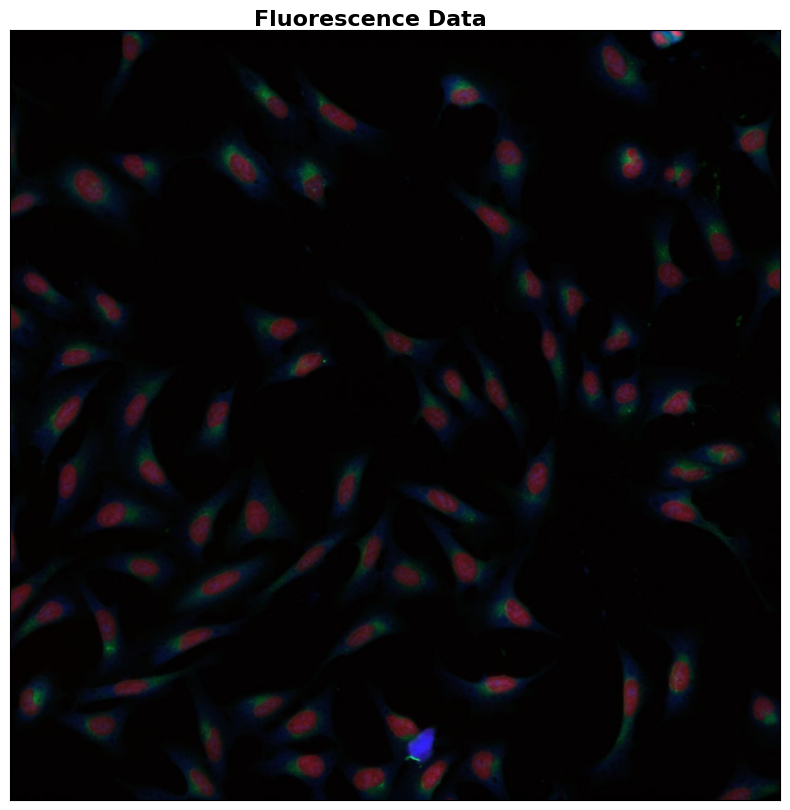

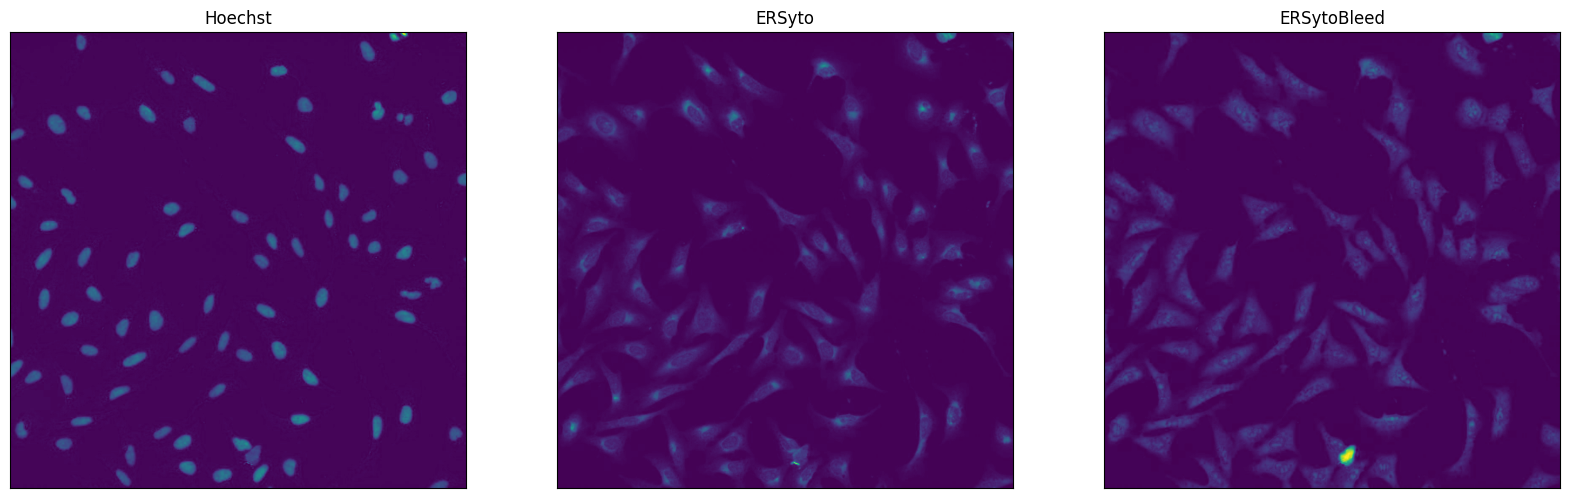

In [14]:
# sources
# - https://idr.openmicroscopy.org/
# - https://biapol.github.io/blog/robert_haase/browsing_idr/readme.html
# - https://idr.openmicroscopy.org/webclient/api/plates/
# - https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
# - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html
# - https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots
# - https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
# - https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801


# data source
# https://idr.openmicroscopy.org/webclient/api/plates/
# https://idr.openmicroscopy.org/webclient/img_detail/3232695/
# 41744_illum_corrected [Well G9, Field 7]
# data are published under CC BY 4.0, https://creativecommons.org/licenses/by/4.0/



# import modules
import json
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import requests
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np


# initialize and define variables and parameter
screen_id = 1751
imageID = "3232695"
myLink  = "https://idr.openmicroscopy.org/webclient/render_image/" + imageID + "/"
dictImageMetaData = {}
cell_text = []


# load data
################ Import metadata ################
# configure which dataset to browse
# screen_id = 2302
MAP_URL = "https://idr.openmicroscopy.org/webclient/api/annotations/?type=map&{type}={screen_id}"

# open an interface to the internet
with requests.Session() as session:
    # turn the generic MAP_URL into a specific URL for the screen
    qs = {'type': 'screen', 'screen_id': screen_id}
qs = {'image_id': imageID}
IMAGE_DETAILS_URL = "https://idr.openmicroscopy.org/webclient/imgData/{image_id}/"
url = IMAGE_DETAILS_URL.format(**qs)
r = session.get(url)
with open("./Data/02_01_ImageMetaData.json", "w") as outfile:
    if r.status_code == 200:
        json.dump(r.json(), outfile, indent = 4, sort_keys = True)
with open('./Data/02_01_ImageMetaData.json', 'r') as openfile:
    dictImageMetaData = json.load(openfile)


# compute results
################ Import image ################
myImage = imread(myLink)

# table 1: file imformation
tableColumnsFileInfo =  ["File Info"]
tableRowsFileInfo    =  ['myLink', 'MAP_URL', 'IMAGE_DETAILS_URL', 'imageId', 'tiles', 'wellId', 'height', 'width']
tableDataFileInfo    =  [
                            [str(myLink)],
                            [str(MAP_URL)],
                            [str(url)],
                            [str(dictImageMetaData["meta"]['imageId'])],
                            [str(dictImageMetaData["tiles"])],
                            [str(dictImageMetaData["meta"]['wellId'])],
                            [str(dictImageMetaData["size"]['height'])],
                            [str(dictImageMetaData["size"]['width'])],
                        ]
cell_text0 = []
for row in range(len(tableDataFileInfo)):
    cell_text0.append(tableDataFileInfo[row])

# table 2: channel information
tableColumnsChannelInfo =   ['label', 'active status', 'hexacode']
tableRowsChannelInfo    =   ['Red Channel','Green Channel','Blue Channel','Blue Channel','Blue Channel']
tableDataChannelInfo    =   [
                            [str(dictImageMetaData["channels"][0]['label']), str(dictImageMetaData["channels"][0]['active']), str(dictImageMetaData["channels"][0]['color'])],
                            [str(dictImageMetaData["channels"][1]['label']), str(dictImageMetaData["channels"][1]['active']), str(dictImageMetaData["channels"][1]['color'])],
                            [str(dictImageMetaData["channels"][2]['label']), str(dictImageMetaData["channels"][2]['active']), str(dictImageMetaData["channels"][2]['color'])],
                            [str(dictImageMetaData["channels"][3]['label']), str(dictImageMetaData["channels"][3]['active']), str(dictImageMetaData["channels"][3]['color'])],
                            [str(dictImageMetaData["channels"][4]['label']), str(dictImageMetaData["channels"][4]['active']), str(dictImageMetaData["channels"][4]['color'])],
                            ]

# there is no pixel size available for this micrograph!
cell_text = []
for row in range(len(tableDataChannelInfo)):
    cell_text.append(tableDataChannelInfo[row])
rowColors =  [
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            ]
colColors =  [
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            ]
colColors0 =  [
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            ]
rowColors0 =  [
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            [0.54901961, 0.58559016, 0.77517878, 1. ],
            ]

################ show figure ################
# set up figure grid
fig = plt.figure(figsize = (20, 10))
gs = GridSpec(nrows = 1, ncols = 1)

# plot image
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(myImage)
# ax0 = plt.gca()
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)# Hide axes border

plt.suptitle("Fluorescence Data", fontweight = "bold", fontsize = 16, y = 0.9)# Add footer
plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
plt.show()


fig = plt.figure(figsize = (10, 4.5))
gs = GridSpec(nrows = 2, ncols = 1)
ax1 = fig.add_subplot(gs[0, 0])
the_table = plt.table(cellText   = cell_text0,
                      rowLabels  = tableRowsFileInfo,
                      rowColours = rowColors0,
                      colLabels  = tableColumnsFileInfo,
                      colColours = colColors0,
                      loc        = 'center')
the_table.scale(0.9, 1.4)
ax1 = plt.gca()
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.box(on = None)


ax2 = fig.add_subplot(gs[1, 0])
the_table = plt.table(cellText   = cell_text,
                      rowLabels  = tableRowsChannelInfo,
                      rowColours = rowColors,
                      colLabels  = tableColumnsChannelInfo,
                      colColours = colColors,
                      loc        = 'center')
the_table.scale(0.9, 1.4)
ax2 = plt.gca()
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
plt.box(on = None)


fig = plt.figure(figsize = (20, 7))
gs = GridSpec(nrows = 1, ncols = 3)

ax3 = fig.add_subplot(gs[0, 0])
plt.imshow(myImage[:,:,0])
ax3 = plt.gca()
ax3.set_title('Hoechst')
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

ax4 = fig.add_subplot(gs[0, 1])
plt.imshow(myImage[:,:,1])
ax4 = plt.gca()
ax4.set_title('ERSyto')
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)

ax5 = fig.add_subplot(gs[0, 2])
plt.imshow(myImage[:,:,2])
ax5 = plt.gca()
ax5.set_title('ERSytoBleed')
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)

### Step 2: Save image

In [15]:
# import modules
import cv2

# save a image using extension
cv2.imwrite("./Data/02_01_myImageRGB.tif", myImage)
cv2.imwrite("./Data/02_01_myImageR.tif", myImage[:,:,0])
cv2.imwrite("./Data/02_01_myImageG.tif", myImage[:,:,1])
cv2.imwrite("./Data/02_01_myImageB.tif", myImage[:,:,2])

True

### 1.2.2 <a name="BinaryMasksOnNucleiAndWholeCells">Binary Masks on Nuclei and Whole Cells</a>

### Step 3: Preprocessing of data: Set up the masks, exclude debris

Define nuclei mask

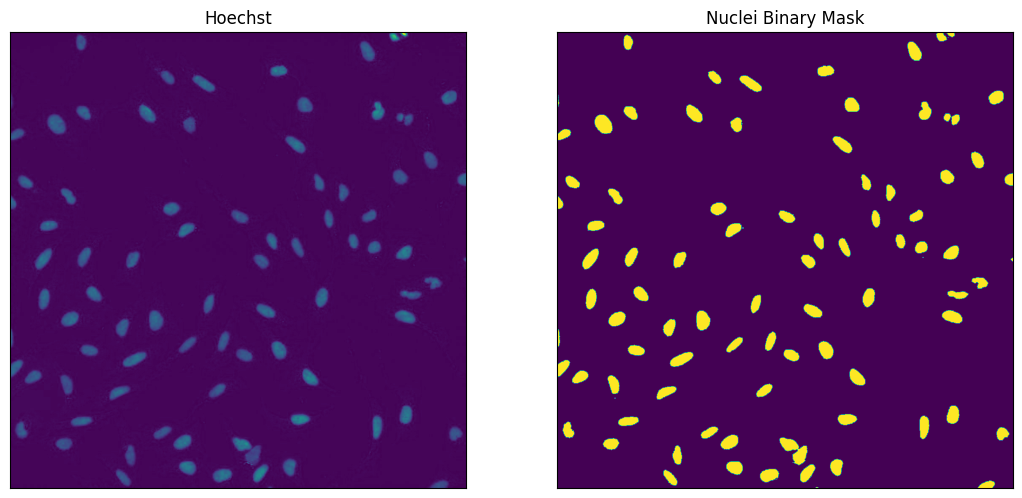

In [16]:
# import modules
import cv2
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage

# define filenames and parameters
fileName          = "02_01_myImageR.tif"
myThresholdValue   = 30

myImage            = cv2.imread('./Data/' + fileName)
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
# ret, thresh        = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# fill holes

# define binary mask on computed on thresholded image
myImageThresholded                                 = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > myThresholdValue] = 1
myImageThresholded                                 = ndimage.binary_fill_holes(myImageThresholded).astype(int)

# plot figure
fig = plt.figure(figsize = (20, 10))
gs = GridSpec(nrows = 1, ncols = 3)

ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(myImage[:,:,0])
ax0 = plt.gca()
ax0.set_title('Hoechst')
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

ax1 = fig.add_subplot(gs[0, 1])
plt.imshow(myImageThresholded)
ax1 = plt.gca()
ax1.set_title('Nuclei Binary Mask')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

Remove small objects from nuclei mask

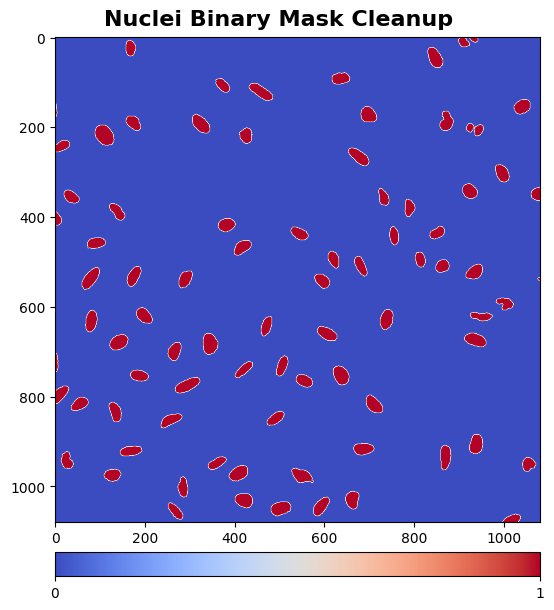

In [17]:
from skimage import morphology

# sources
# - https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects

# remove small objects
minimum_pixelarea                              = 30
myImageThresholdedtmp                          = []
myImageThresholdedrso                          = []
myImageThresholdedtmp                          = myImageThresholded
myImageThresholdedtmp[980+20:1030, 550:585]    = 0
myImageThresholdedtmp[980:1025, 550+25:585+20] = 0
myImageThresholdedtmp[990+2:1010, 550:585+20]  = 0
myImageThresholdedrso = morphology.remove_small_objects(np.array(myImageThresholdedtmp, dtype=bool), minimum_pixelarea)
myImageRThresholdedRSO = myImageThresholdedrso


# plot figure
fig, ax            = plt.subplots(figsize = (15, 7))
im                 = ax.imshow(myImageThresholdedrso, cmap = cm.coolwarm)
divider            = make_axes_locatable(ax)
cax                = divider.new_vertical(size = "5%", pad = 0.3, pack_start = True)
fig.add_axes(cax)
cbar               = fig.colorbar(im, cax = cax, ticks = [-1, 0, 1], orientation = 'horizontal')
plt.suptitle("Nuclei Binary Mask Cleanup", fontweight = "bold", fontsize = 16, y = 0.92)# Add footer
ax.set_xlabel("binary mask color scheme")
# ax.set_xticks([])
# ax.set_yticks([])
plt.show()

Define mask for cytoplasm and mask out debris

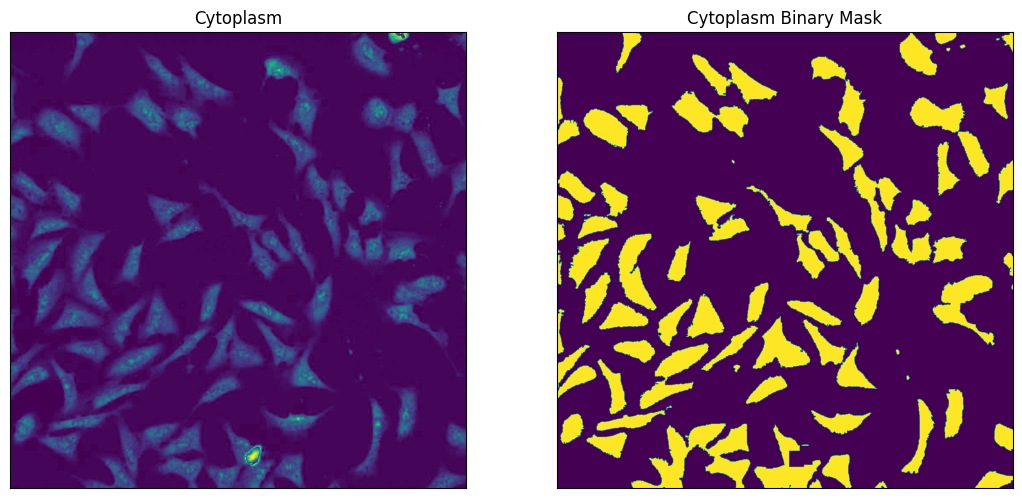

In [18]:
# sources
# - https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects


# import modules
from skimage import morphology


# define filenames and parameters
fileName          = "02_01_myImageB.tif"
myThresholdValue   = 10

myImage            = cv2.imread('./Data/' + fileName)
myImageGray        = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
# ret, thresh        = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# fill holes

# define binary mask on computed on thresholded image
myImageThresholded                                 = np.zeros(myImageGray.shape)
myImageThresholded[myImageGray > myThresholdValue] = 1
myImageThresholded                                 = ndimage.binary_fill_holes(myImageThresholded).astype(int)

# remove small objects
minimum_pixelarea                                  = 30
myImageThresholdedtmp                              = []
myImageThresholdedrso                              = []
myImageThresholdedtmp                              = myImageThresholded

# remove specific debris
myImageThresholdedtmp[980+20:1030, 550:585]        = 0
myImageThresholdedtmp[980:1025, 550+25:585 + 20]   = 0
myImageThresholdedtmp[990+2:1010, 550:585 + 20]    = 0
myImageThresholdedrso = morphology.remove_small_objects(np.array(myImageThresholdedtmp, dtype = bool), minimum_pixelarea)
myImageGThresholdedRSO = myImageThresholdedrso


# plot figure
fig = plt.figure(figsize = (20, 10))
gs = GridSpec(nrows = 1, ncols = 3)

ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(myImage[:,:,0]*2)
ax0 = plt.gca()
ax0.set_title('Cytoplasm')
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

ax1 = fig.add_subplot(gs[0, 1])
plt.imshow(myImageThresholdedrso)
ax1 = plt.gca()
ax1.set_title('Cytoplasm Binary Mask')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

Review masks

In [19]:
# compute results
contours, myImageContours, myMaskRContoursAll, myMaskRContoursAllLabel = Groundwork.identifyCellContours(myImage, myImageRThresholdedRSO, showCenterOfMass=False, perimeterColor=[20, 240, 20])
contours, myImageContours, myMaskGContoursAll, myMaskGContoursAllLabel = Groundwork.identifyCellContours(myImage, myImageGThresholdedRSO, showCenterOfMass=False, perimeterColor=[20, 240, 20])
contours, myImageContours, myMaskBContoursAll, myMaskBContoursAllLabel = Groundwork.identifyCellContours(myImage, myImageGThresholdedRSO, showCenterOfMass=False, perimeterColor=[20, 20, 240])

myMaskContoursAll                        = np.zeros(myImage.shape)
myMaskContoursAll[myMaskGContoursAll==1] = 100
myMaskContoursAll[myMaskRContoursAll==1] = 255

print(np.min(myMaskGContoursAllLabel))
print(np.max(myMaskGContoursAllLabel))


# plot figure
fig = plt.figure(figsize = (20, 19))
gs = GridSpec(nrows = 1, ncols = 3)
ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(myImageContours*2)
ax0 = plt.gca()
ax0.set_title('Cells With Boundaries')
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

ax1 = fig.add_subplot(gs[0, 1])
plt.imshow(myMaskContoursAll.astype(np.uint8))
ax1 = plt.gca()
ax1.set_title('Cell Binary Masks')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(gs[0, 2])
plt.imshow(myMaskGContoursAllLabel.astype(np.uint8))
ax2 = plt.gca()
ax2.set_title('Cell Binary Masks with Labels')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

0.0
78.0


Eliminate everything without a nucleus from cytoplasmic mask

In [20]:
# import modules
import math


# define filenames and parameters
plotstatus = False
jj=0
myMaskContoursAllCorrected   = np.zeros((myImage.shape[0], myImage.shape[1],int(np.max(myMaskBContoursAllLabel))))
print(myMaskContoursAllCorrected.shape)


# compute results
for ii in range(1,int(np.max(myMaskBContoursAllLabel))+1):
    myMaskTmp = np.zeros((myImage.shape[0], myImage.shape[1]))
    myMaskTmp[myMaskBContoursAllLabel==ii]=1
    if np.max(myImageRThresholdedRSO + myMaskTmp) > 1:
        print(str(ii) + ", ", end='')
        myMaskContoursAllCorrected[:,:,ii-1] = myMaskTmp


# plot figure
if plotstatus==True:
    f, axarr = plt.subplots(20,5,figsize = (20, 100))
    for ii in range(int(np.max(myMaskBContoursAllLabel))):
        xindex = ii % 5
        yindex = math.floor(ii / 5)
        axarr[yindex,xindex].imshow(myMaskContoursAllCorrected[:,:,ii])
        axarr[yindex,xindex].set_title(ii)

(1080, 1080, 78)
3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 76, 77, 78, 

Review masks

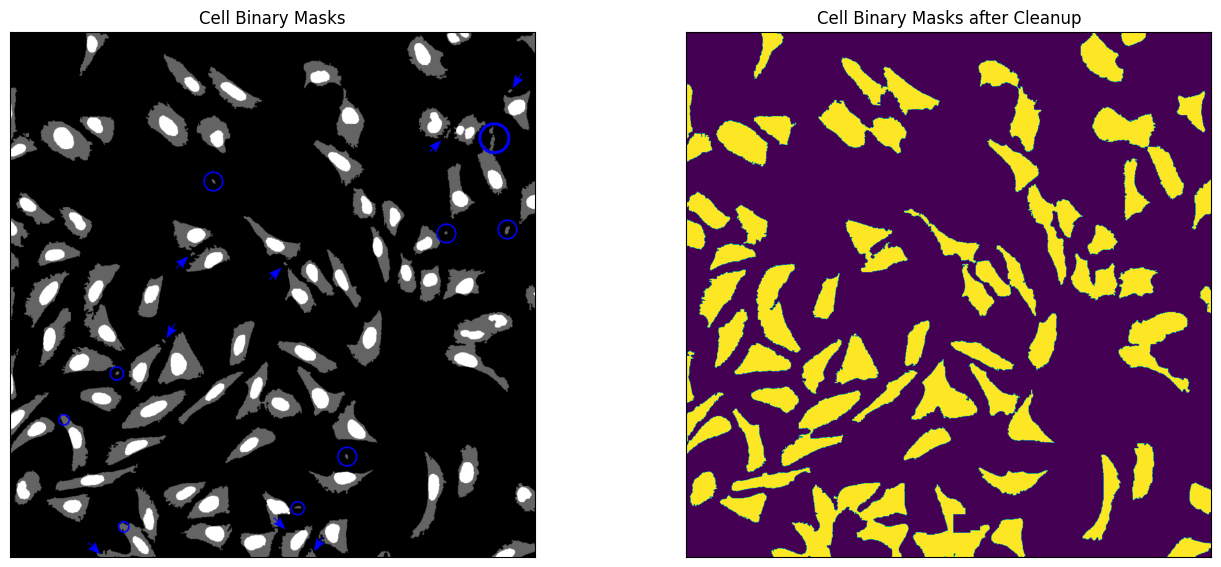

In [21]:
# compute results
result = np.sum(myMaskContoursAllCorrected[:,:,1:], axis = 2)

myMaskContoursAll_Marks = cv2.imread('./Figures/myMaskContoursAll_Marks.png')


# plot figure
fig = plt.figure(figsize = (16, 15))
gs = GridSpec(nrows = 2, ncols = 2)

ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(myMaskContoursAll_Marks.astype(np.uint8))
ax0 = plt.gca()
ax0.set_title('Cell Binary Masks')
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
cv2.imwrite('./Figures/myMaskContoursAll.png', myMaskContoursAll)

ax1 = fig.add_subplot(gs[0, 1])
plt.imshow(result)
ax1 = plt.gca()
ax1.set_title('Cell Binary Masks after Cleanup')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

### 1.2.3 <a name="FirstAnalysisOnAnExampleMicrograph">Ellipse Fitting of Nuclei and Whole Cells</a>

Ellipse fit on nuclei and whole cell

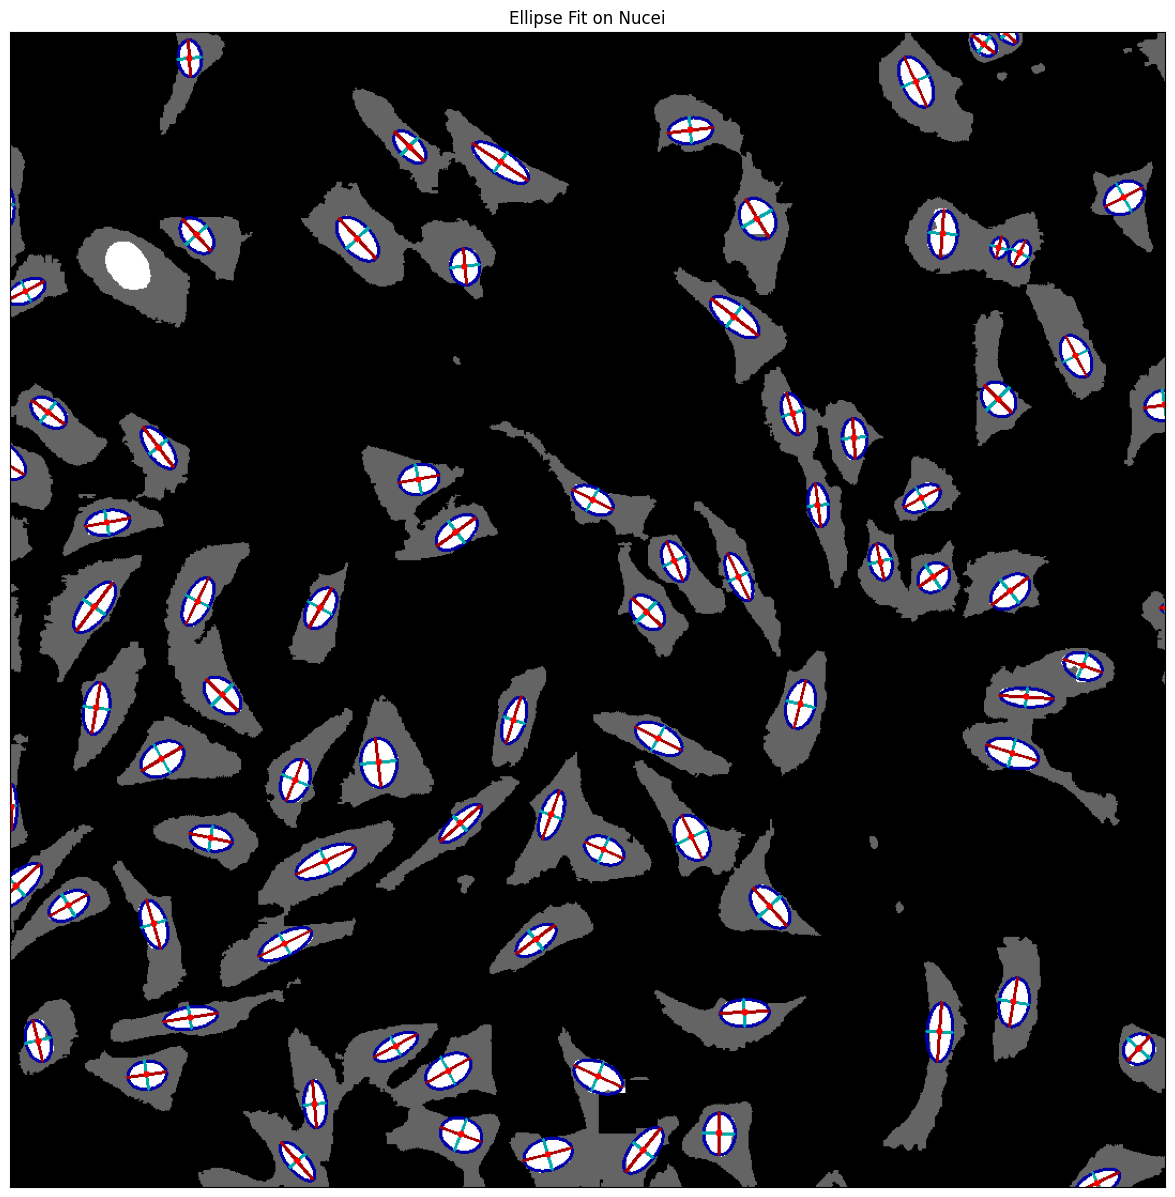

In [48]:
# sources
# - https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# - https://de.mathworks.com/matlabcentral/answers/43435-i-couldn-t-understand-convex-area
# - https://stackoverflow.com/questions/32401806/get-mask-from-contour-with-opencv
# - https://stackoverflow.com/questions/50591442/convert-3-dim-image-array-to-2-dim
# - https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
# - https://www.tutorialspoint.com/how-to-compute-the-area-and-perimeter-of-an-image-contour-using-opencv-python
# - https://www.tutorialspoint.com/how-to-fit-the-ellipse-to-an-object-in-an-image-using-opencv-python

# sources of main algorithms
# https://www.kaggle.com/code/voglinio/separating-nuclei-masks-using-convexity-defects
# User: Costas Voglis
# and
# https://stackoverflow.com/questions/62698756/opencv-calculating-orientation-angle-of-major-and-minor-axis-of-ellipse
# User: fmw42, Fred Weinhaus

# import modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from skimage.measure import regionprops
import math


fileName = "02_01_myImageRGB.tif"
myImage  = cv2.imread('./Data/' + fileName)


# compute results
myImageEllipseR = Groundwork.ellipseFit(myMaskContoursAll.astype(np.uint8),
                                        myImageRThresholdedRSO, 4000)

# plot figure
fig = plt.figure(figsize = (16, 15))
gs = GridSpec(nrows = 1, ncols = 1)

ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(myImageEllipseR)
ax0 = plt.gca()
ax0.set_title('Ellipse Fit on Nucei')
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

Compute Mean Area of Nuclei and Mean Intensity

In [35]:
# import modules
import math


# define filenames and parameters
plotstatus = False
jj         = 0
myMaskRContoursAllCorrected = np.zeros((myImage.shape[0], myImage.shape[1],int(np.max(myMaskRContoursAllLabel))))
myMaskTmpIntensity          = np.zeros((myImage.shape[0], myImage.shape[1],int(np.max(myMaskRContoursAllLabel))))
filledAreaNuclei            = []
meanIntensityNuclei         = []


print(myMaskContoursAllCorrected.shape)

# compute results
for ii in range(1,int(np.max(myMaskRContoursAllLabel))+1):
    myMaskTmp = np.zeros((myImage.shape[0], myImage.shape[1]))
    myMaskTmp[myMaskRContoursAllLabel==ii]=1
    if np.max(myImageRThresholdedRSO + myMaskTmp) > 1:
        print(str(ii) + ", ", end = '')
        myMaskRContoursAllCorrected[:,:,ii-1] = myMaskTmp
        numberOfPixel = np.sum(np.sum(myMaskTmp, axis = 0), axis = 0)
        filledAreaNuclei.append(numberOfPixel)
        myMaskTmpIntensity[:,:,ii-1]=myMaskTmp*myImage[:,:,2]
        integratedIntensity = np.sum(np.sum(myMaskTmp*myImage[:,:,2], axis = 0), axis = 0)
        meanIntensityNuclei.append(integratedIntensity / numberOfPixel)


# plot figure
if plotstatus==True:
    f, axarr = plt.subplots(17,5,figsize = (20, 100))
    for ii in range(int(np.max(myMaskRContoursAllLabel))):
        xindex = ii % 5
        yindex = math.floor(ii / 5)
        axarr[yindex,xindex].imshow(myMaskTmpIntensity[:,:,ii])
        axarr[yindex,xindex].set_title(ii)

print("")
print("filledAreaNuclei", filledAreaNuclei)
print("meanIntensityNuclei", meanIntensityNuclei)

(1080, 1080, 78)
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 
filledAreaNuclei [501.0, 683.0, 1072.0, 936.0, 988.0, 913.0, 739.0, 778.0, 1035.0, 1056.0, 666.0, 705.0, 713.0, 838.0, 1016.0, 927.0, 1020.0, 886.0, 747.0, 862.0, 801.0, 1012.0, 770.0, 1169.0, 775.0, 775.0, 1125.0, 714.0, 786.0, 247.0, 873.0, 1059.0, 1230.0, 1076.0, 967.0, 749.0, 669.0, 954.0, 1002.0, 883.0, 664.0, 30.0, 769.0, 835.0, 1134.0, 914.0, 907.0, 671.0, 757.0, 592.0, 678.0, 868.0, 780.0, 777.0, 636.0, 641.0, 873.0, 341.0, 767.0, 648.0, 706.0, 629.0, 470.0, 843.0, 883.0, 1062.0, 608.0, 733.0, 1447.0, 386.0, 243.0, 766.0, 1103.0, 914.0, 967.0, 110.0, 910.0, 1105.0, 638.0, 812.0, 1076.0, 614.0, 173.0, 390.0]
meanIntensityNuclei [27.74451097

Plot Mean Area of Nuclei and Mean Intensity

Text(0, 0.5, 'number of nuclei')

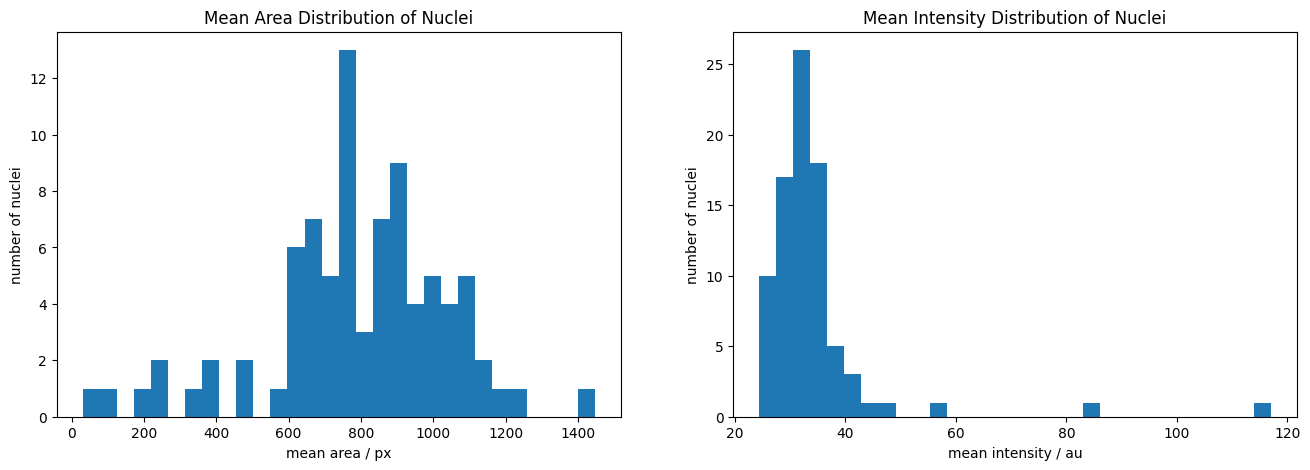

In [36]:
# plot figure
fig = plt.figure(figsize = (16, 5))
gs = GridSpec(nrows = 1, ncols = 2)

ax0 = fig.add_subplot(gs[0, 0])
plt.hist(filledAreaNuclei, bins=30)
ax0 = plt.gca()
ax0.set_title('Mean Area Distribution of Nuclei')
ax0.set_xlabel('mean area / px')
ax0.set_ylabel('number of nuclei')

ax1 = fig.add_subplot(gs[0, 1])
plt.hist(meanIntensityNuclei, bins=30)
ax1 = plt.gca()
ax1.set_title('Mean Intensity Distribution of Nuclei')
ax1.set_xlabel('mean intensity / au')
ax1.set_ylabel('number of nuclei')

### 1.2.4 <a name="SegmentationOfCellsUsingVoronoiTesselation">Segmentation of Cells using Voronoi Tesselation</a>

Goal: Segmentation (first approach) using the Voronoi tesselation.

Steps:
1. Compute ellipse-centers on nuclei
2. Apply Voronoi tesselation using the ellipse-centers as seeds

In [39]:
masterarray, myImageInclCenters = Groundwork.ellipseFitCenterPos(myMaskContoursAll.astype(np.uint8), myImageRThresholdedRSO)
# print(masterarray)

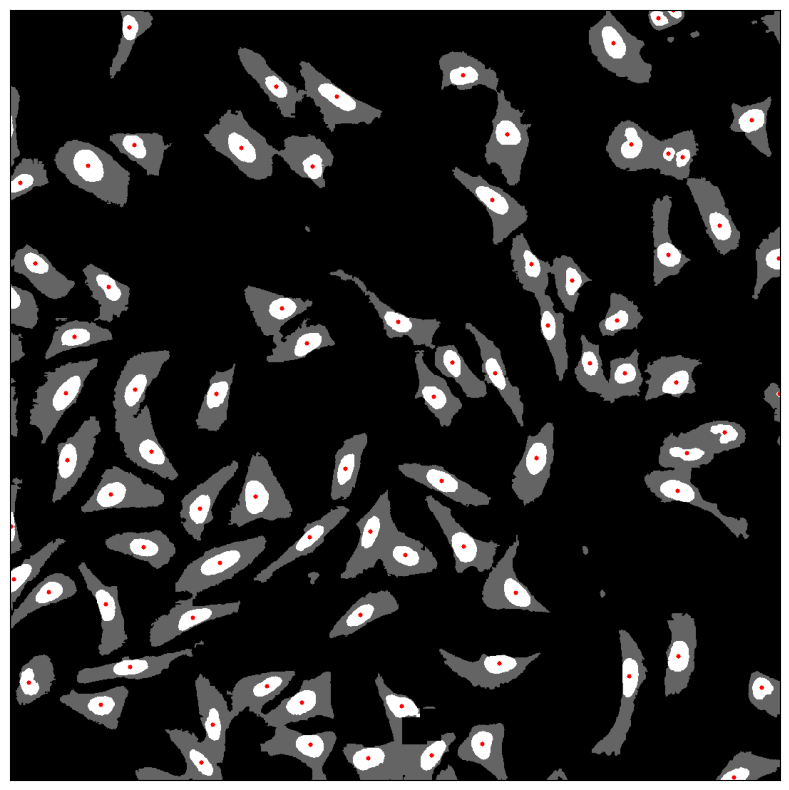

In [40]:
import sys
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt
from skimage import io, filters
from skimage.feature import peak_local_max


fileName = "02_01_myImageRGB.tif"
myImage            = cv2.imread('./Data/' + fileName)

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)
ax.imshow(ndimage.rotate(myImageInclCenters, 0))
cv2.circle(myImage, (int(masterarray[3, 0]), int(masterarray[3, 1])), 5, (255, 0, 0), -1)
vor = Voronoi(masterarray)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

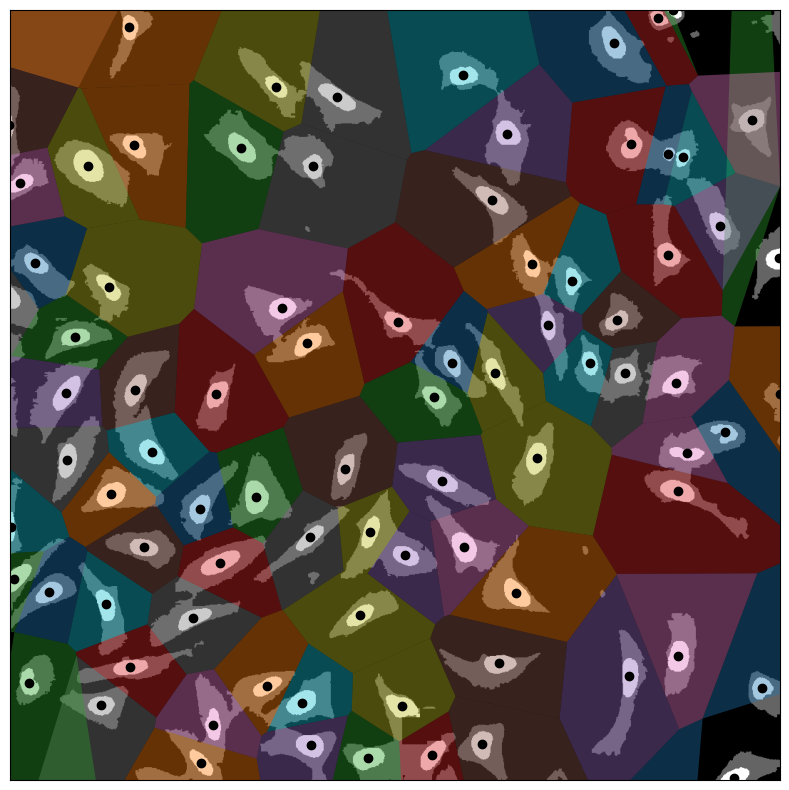

In [41]:
# sources
# - https://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
# - https://stackoverflow.com/questions/52184271/image-and-voronoi-diagram-on-the-same-figure


# import modules
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
import numpy as np
from scipy.spatial import Voronoi


# compute Voronoi tesselation
vor = Voronoi(masterarray)


# plot
regions, vertices = Groundwork.voronoi_finite_polygons_2d(vor)
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(111)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(masterarray[:,0], masterarray[:,1], 'ko')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(ndimage.rotate(myImageInclCenters, 0))
plt.show()

The results on the given dataset are ok but not remarkable. Still, this algorithm is very robust and one can work with this segmentation: Each of the ellipse centers serves as a seed and the entire set is radially expanded. The points of contact with the neighboring areas limit the evaluation area for each cell. The real strength of the approach is when it comes to dense (i.e. confluent) cell or tissue recordings, where there is hardly any background signal.

# 2. <a name="AnalysisOfTimeLapseSeries">Analysis of Time Series Recordings</a>

## 2.1 <a name="AutomatedCurvatureInspectionOfRealCells">Automated Curvature Inspection of Real Cells</a>

Goal: Analyse a time series recording of cells with respect to contour / shape and local degree of curvature

Step 1: Thresholding

Text(0.5, 1.0, 'Fundulus heteroclitus embryo during gastrulation')

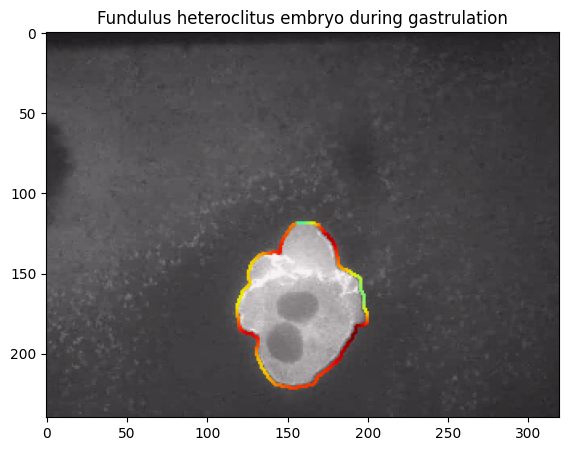

In [42]:
# sources
# - https://stackabuse.com/opencv-edge-detection-in-python-with-cv2canny/
# - http://www.learningaboutelectronics.com/Articles/How-to-find-the-largest-or-smallest-object-in-an-image-Python-OpenCV.php


# data source
# Rachel Fink, Pat Wadsworth (2011) CIL:35204, Fundulus heteroclitus, deep cell. CIL. Dataset. https://doi.org/doi:10.7295/W9CIL35204
# - http://cellimagelibrary.org/images/35204
# data are published under (CC BY-NC-SA 3.0) , https://creativecommons.org/licenses/by-nc-sa/3.0/


# import modules
import cv2
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy import ndimage
import time


# contour determination
def get_contour_areas(contours):
    all_areas= []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas


# initialize and define variables and parameter
filename                                           = "./DataExternalMov/35204.mov"
cap                                                = cv2.VideoCapture(filename)
frames_all                                         = []
start                                              = time.time()
cap                                                = cv2.VideoCapture(filename)
i                                                  = 40
success                                            = cap.grab()
ret, image                                         = cap.retrieve()
kernel                                             = np.ones((2, 2), np.uint8)
myImageGray                                        = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# threshold processing
myImageThresholded                                 = np.zeros(myImageGray.shape)
myThresholdValue                                   = 210
myImageThresholded[myImageGray > myThresholdValue] = 1
t_lower                                            = 210
t_upper                                            = 250
aperture_size                                      = 3
cannyImg                                           = cv2.Canny(myImageGray, t_lower, t_upper, apertureSize = aperture_size)
dilation                                           = cv2.dilate(cannyImg, kernel, iterations = 2)
dilation[myImageThresholded == 1]                  = 255
cannyImgFill                                       = ndimage.binary_fill_holes(dilation).astype(int)
cannyImgRGB                                        = np.zeros(image.shape)
cannyImgRGB[:,:,0]                                 = cannyImgFill * 255
cannyImgRGBConv                                    = np.asarray(cannyImgRGB, np.uint8)


# contour determination
contours, hierarchy                                = cv2.findContours(cannyImgFill.astype(np.uint8), 1, 1)
sorted_contours                                    = sorted(contours, key=cv2.contourArea, reverse= True)
largest_item                                       = sorted_contours[0]
myMaskContoursAllCurvatureValues                   = cv2.drawContours(image, largest_item, -1, (255,255,255),1)
contoursxy                                         = np.zeros((len(largest_item), 2))
ll                                                 = list(largest_item)
contoursx                                          = []
contoursy                                          = []

for ii in range(len(ll)):
    contoursx.append(ll[ii][0][0])
    contoursy.append(ll[ii][0][1])

if len(contoursxy) > 1:
    contoursxy[:,0]                 = contoursx
    contoursxy[:,1]                 = contoursy
    contourCurvature, contourPixels = Groundwork.calculateContourCurvature(contoursxy)
    y                               = contourCurvature
    yhat = gaussian_filter(y, sigma = 10)

    for ii in range(len(contourPixels)):
        colorValue = 255*yhat[ii]/max(yhat)
        if np.isnan(colorValue) == False:
            colorPos   = int(round(colorValue))
            rcolor     = int(round(cm.jet(colorPos)[0]*255))
            gcolor     = int(round(cm.jet(colorPos)[1]*255))
            bcolor     = int(round(cm.jet(colorPos)[2]*255))
            rgbcolor   = [rcolor, gcolor, bcolor]
            thickness  = 1
            myMaskContoursAllCurvatureValues[int(contoursxy[ii,1])-thickness:int(contoursxy[ii,1])+thickness,int(contoursxy[ii,0])-thickness:int(contoursxy[ii,0])+thickness,:] = rgbcolor

added_image = cv2.addWeighted(myMaskContoursAllCurvatureValues, 0.95, cannyImgRGBConv, 0.01, 0)
frames_all.append(added_image)

fig = plt.figure(figsize = (7, 5))
gs = GridSpec(nrows = 1, ncols = 1)

ax0 = fig.add_subplot(gs[0, 0])
plt.imshow(added_image)
ax0 = plt.gca()
ax0.set_title('Fundulus heteroclitus embryo during gastrulation')

Step 2:

1. Load video and process frame by frame
2. Threshold with the values obtained from above
3. Apply contour-finding on the threshold binary mask
4. Colorcode the contour with curvature values using jetmap-colorcoding
5. Overlay with micrograph
6. Export as video

In [43]:
# sources
# - http://www.learningaboutelectronics.com/Articles/How-to-find-the-largest-or-smallest-object-in-an-image-Python-OpenCV.php
# - https://stackabuse.com/opencv-edge-detection-in-python-with-cv2canny/
# - https://z-uo.medium.com/opencv-automatic-select-big-contour-areas-and-remove-8d79464a06e7


# data source
# Rachel Fink, Pat Wadsworth (2011) CIL:35204, Fundulus heteroclitus, deep cell. CIL. Dataset. https://doi.org/doi:10.7295/W9CIL35204
# - http://cellimagelibrary.org/images/35204
# data are published under (CC BY-NC-SA 3.0) , https://creativecommons.org/licenses/by-nc-sa/3.0/


# import modules
import cv2
import imageio
from matplotlib import cm
import matplotlib.pyplot as plt
import ModulesOwnAndExternalModified.A_Groundwork as Groundwork
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import time
import warnings
warnings.filterwarnings('ignore')


# contour determination
def get_contour_areas(contours):
    all_areas= []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas


# initialize and define variables and parameter
filename   = "./DataExternalMov/35204.mov"
cap        = cv2.VideoCapture(filename)
frames_all = []
start      = time.time()
cap        = cv2.VideoCapture(filename)


for i in range(0, 84):
    success                                            = cap.grab()
    ret, image                                         = cap.retrieve()
    kernel                                             = np.ones((2, 2), np.uint8)
    myImageGray                                        = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    # threshold processing
    myImageThresholded                                 = np.zeros(myImageGray.shape)
    myThresholdValue                                   = 140
    myImageThresholded[myImageGray > myThresholdValue] = 1
    t_lower                                            = 210
    t_upper                                            = 250
    aperture_size                                      = 3
    myImageThresholdedDilation                         = cv2.dilate(myImageThresholded, kernel, iterations = 2)
    myImageThresholdedDilationFill                     = ndimage.binary_fill_holes(myImageThresholdedDilation).astype(int)
    myImageThresholdedRGB                              = np.zeros(image.shape)
    myImageThresholdedRGB[:,:,0]                       = myImageThresholdedDilationFill * 255
    myImageThresholdedRGBConv                          = np.asarray(myImageThresholdedRGB, np.uint8)


    # contour determination
    contours, hierarchy                                = cv2.findContours(myImageThresholdedDilationFill.astype(np.uint8), 1, 1)
    sorted_contours                                    = sorted(contours, key = cv2.contourArea, reverse = True)
    largest_item                                       = sorted_contours[0]
    myMaskContoursAllCurvatureValues                   = cv2.drawContours(image, largest_item, -1, (255,255,255), 1)
    contoursxy                                         = np.zeros((len(largest_item), 2))
    ll                                                 = list(largest_item)
    contoursx                                          = []
    contoursy                                          = []

    for ii in range(len(ll)):
        contoursx.append(ll[ii][0][0])
        contoursy.append(ll[ii][0][1])

    if len(contoursxy) > 1:
        contoursxy[:,0]                 = contoursx
        contoursxy[:,1]                 = contoursy
        contourCurvature, contourPixels = Groundwork.calculateContourCurvature(contoursxy)
        y                               = contourCurvature
        yhat                            = gaussian_filter(y, sigma = 10)

        for ii in range(len(contourPixels)):
            colorValue = 255 * yhat[ii] / max(yhat)
            if np.isnan(colorValue) == False:
                colorPos   = int(round(colorValue))
                rcolor     = int(round(cm.jet(colorPos)[0]*255))
                gcolor     = int(round(cm.jet(colorPos)[1]*255))
                bcolor     = int(round(cm.jet(colorPos)[2]*255))
                rgbcolor   = [rcolor, gcolor, bcolor]
                thickness  = 2
                myMaskContoursAllCurvatureValues[int(contoursxy[ii,1])-thickness:int(contoursxy[ii,1])+thickness,int(contoursxy[ii,0])-thickness:int(contoursxy[ii,0])+thickness,:] = rgbcolor

    added_image = cv2.addWeighted(myMaskContoursAllCurvatureValues, 0.95, myImageThresholdedRGBConv, 0.01, 0)
    frames_all.append(added_image)
    frames_all.append(added_image)
    frames_all.append(added_image)

    if (i == 100):
        ret, image = cap.retrieve()
        end = time.time()
        plt.figure(1)
        plt.imshow(added_image)

frame_one = frames_all[0]
imageio.mimsave('./DataExternalMov/35204.gif', frames_all, loop = 0, duration = 0.1)

![35204](./DataExternalMov/35204.gif)

# 100. <a name="Appendix">Appendix</a>

## 100.1 <a name="htmlExportOfCode">.html-Export of Code</a>

In [52]:
# export code to html
import os
os.system("jupyter nbconvert AnalysisOfBioImages.ipynb --to html")

0